In [1]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

In [2]:
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

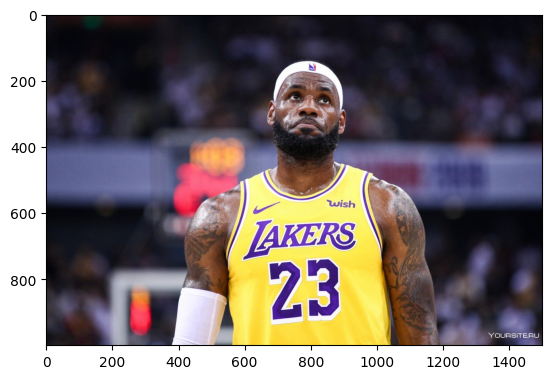

In [3]:
image_path = 'lebron.jpg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [25]:
face_detection_results = face_detection.process(image[:, :, ::-1])
data = []
if face_detection_results.detections:
    
    for face_no, face in enumerate(face_detection_results.detections):
        print(f'FACE NUMBER: {face_no + 1}')
        print('-----------------------')
        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')
        
        face_data = face.location_data
        
        print(f'\nFACE BOUNDING BOX:\n{face_data.bounding_box}')
        
        for i in range(6):
            print(f'{mp_face_detection.FaceKeyPoint(i).name}')
            print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}')
            data.append(face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value])

FACE NUMBER: 1
-----------------------
FACE CONFIDENCE: 0.75

FACE BOUNDING BOX:

RIGHT_EYE
x: 0.48480305075645447
y: 0.2399417757987976

LEFT_EYE
x: 0.5471357107162476
y: 0.23843392729759216

NOSE_TIP
x: 0.5179111361503601
y: 0.2826719880104065

MOUTH_CENTER
x: 0.5162581205368042
y: 0.3383156657218933

RIGHT_EAR_TRAGION
x: 0.44422194361686707
y: 0.27732157707214355

LEFT_EAR_TRAGION
x: 0.5819466710090637
y: 0.2757757902145386



In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_keypoints(image, points):
    fig, ax = plt.subplots()
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    for i in points:
        x, y = i.x * image.shape[1], i.y * image.shape[0]
        circle = patches.Circle((x, y), radius=4, color='red')
        ax.add_patch(circle)

    plt.show()

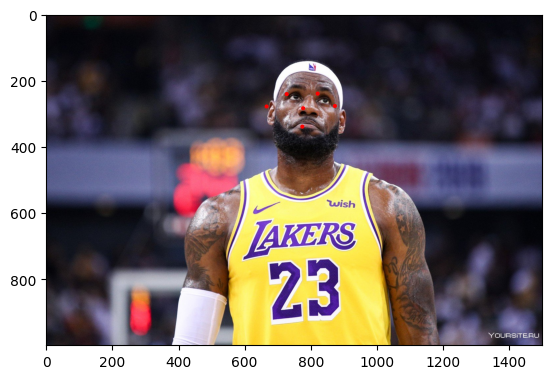

In [31]:
draw_keypoints(image, data)

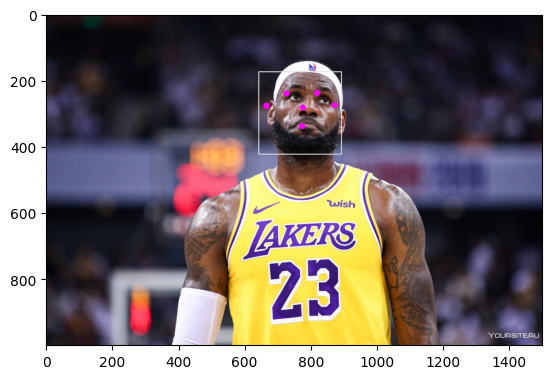

In [33]:
img_copy = image[:, :, ::-1].copy()
if face_detection_results.detections:
    
    for face_no, face in enumerate(face_detection_results.detections):
        mp_drawing.draw_detection(image=img_copy, detection=face,
                                  keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 255), thickness=10, circle_radius=4))
plt.imshow(img_copy)

In [34]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2, min_detection_confidence=0.5)
face_mesh_videos = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, 
                                         min_tracking_confidence=0.3)
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
face_mesh_results = face_mesh_images.process(image[:, :, ::-1])

LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))